In [210]:
import pandas as pd

import warnings

In [211]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [212]:
ams_list = pd.read_csv('ams_list_june.csv')

In [213]:
ams_reviews = pd.read_csv('ams_rev_jun.csv')

In [214]:
ams_reviews['date'] = pd.to_datetime(ams_reviews['date'])

In [217]:
most_recent_date = ams_reviews['date'].max()

print("The most recent date is:", most_recent_date.date())

The most recent date is: 2024-06-10


In [218]:
merged_df_ams = pd.merge(ams_reviews, ams_list, left_on = 'listing_id' , right_on = 'id' , how='inner')

In [219]:
merged_df_ams = merged_df_ams.drop(['neighborhood_overview','host_location', 'host_response_time', 'host_response_rate','host_acceptance_rate','host_neighbourhood','neighbourhood','bathrooms','host_neighbourhood','neighbourhood_group_cleansed','calendar_updated','has_availability','license','host_about','id_x','reviewer_name','id_y','listing_url', 'scrape_id'	,'last_scraped',	'source' , 'picture_url','host_thumbnail_url', 'host_picture_url' ,'host_listings_count', 'host_verifications','minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights'	,'maximum_maximum_nights'	,'minimum_nights_avg_ntm'	,'maximum_nights_avg_ntm',	'availability_30'	,'availability_60'	,'availability_90' ,'calendar_last_scraped','number_of_reviews_ltm'	, 'number_of_reviews_l30d' ,'calculated_host_listings_count'	,'calculated_host_listings_count_entire_homes'	,'calculated_host_listings_count_private_rooms',	'calculated_host_listings_count_shared_rooms','host_name', 'reviews_per_month' ,'review_scores_checkin' , 'review_scores_accuracy'], axis = 1)

In [220]:
merged_df_ams = merged_df_ams.dropna()

In [221]:
merged_df_ams.shape

(326969, 36)

In [222]:
merged_df_ams['first_review'] = pd.to_datetime(merged_df_ams['first_review'])
merged_df_ams['last_review'] = pd.to_datetime(merged_df_ams['last_review'])
merged_df_ams['review_duration_years'] = ((merged_df_ams['last_review'] - merged_df_ams['first_review']).dt.days / 365).astype(int)
merged_df_ams = merged_df_ams.drop(['last_review','first_review','host_url'], axis = 1)

In [223]:
merged_df_ams.shape

(326969, 34)

In [224]:
merged_df_ams.to_csv('preprocessed_data_amsterdam.csv', index = False)

In [192]:
#df_list = pd.read_csv('hague_list.csv')

In [193]:
#df_rev = pd.read_csv('hague_rev.csv')

In [194]:
#df_rev['date'] = pd.to_datetime(df_rev['date'])

In [195]:
#merged_df = pd.merge(df_rev, df_list, left_on = 'listing_id' , right_on = 'id' , how='inner')

In [196]:
#merged_df = merged_df.drop(['neighborhood_overview','host_location', 'host_response_time', 'host_response_rate','host_acceptance_rate','host_neighbourhood','neighbourhood','bathrooms','host_neighbourhood','neighbourhood_group_cleansed','calendar_updated','has_availability','license','host_about','id_x','reviewer_name','id_y','listing_url', 'scrape_id'	,'last_scraped',	'source' , 'picture_url','host_thumbnail_url', 'host_picture_url' ,'host_listings_count', 'host_verifications','minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights'	,'maximum_maximum_nights'	,'minimum_nights_avg_ntm'	,'maximum_nights_avg_ntm',	'availability_30'	,'availability_60'	,'availability_90' ,'calendar_last_scraped','number_of_reviews_ltm'	, 'number_of_reviews_l30d' ,'calculated_host_listings_count'	,'calculated_host_listings_count_entire_homes'	,'calculated_host_listings_count_private_rooms',	'calculated_host_listings_count_shared_rooms','host_name','reviews_per_month' ,'review_scores_checkin' , 'review_scores_accuracy'], axis = 1)

In [197]:
# merged_df['first_review'] = pd.to_datetime(merged_df['first_review'])

# merged_df['last_review'] = pd.to_datetime(merged_df['last_review'])

# merged_df['review_duration_years'] = ((merged_df['last_review'] - merged_df['first_review']).dt.days / 365).astype(int)

# merged_df = merged_df.drop(['last_review','first_review','host_url'], axis = 1)

In [198]:
#merged_df['location'] = 'the Hague'

In [199]:
#merged_df = merged_df.dropna()

In [200]:
#merged_df.shape

In [201]:
#merged_df.to_csv('preprocessed_data_hague.csv', index= False)

In [202]:
# df1 = pd.read_csv('preprocessed_data_amsterdam.csv')

# df2 = pd.read_csv('preprocessed_data_rot.csv')

# df3 = pd.read_csv('preprocessed_data_hague.csv')

In [203]:
#combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [204]:
combined_df = merged_df_ams

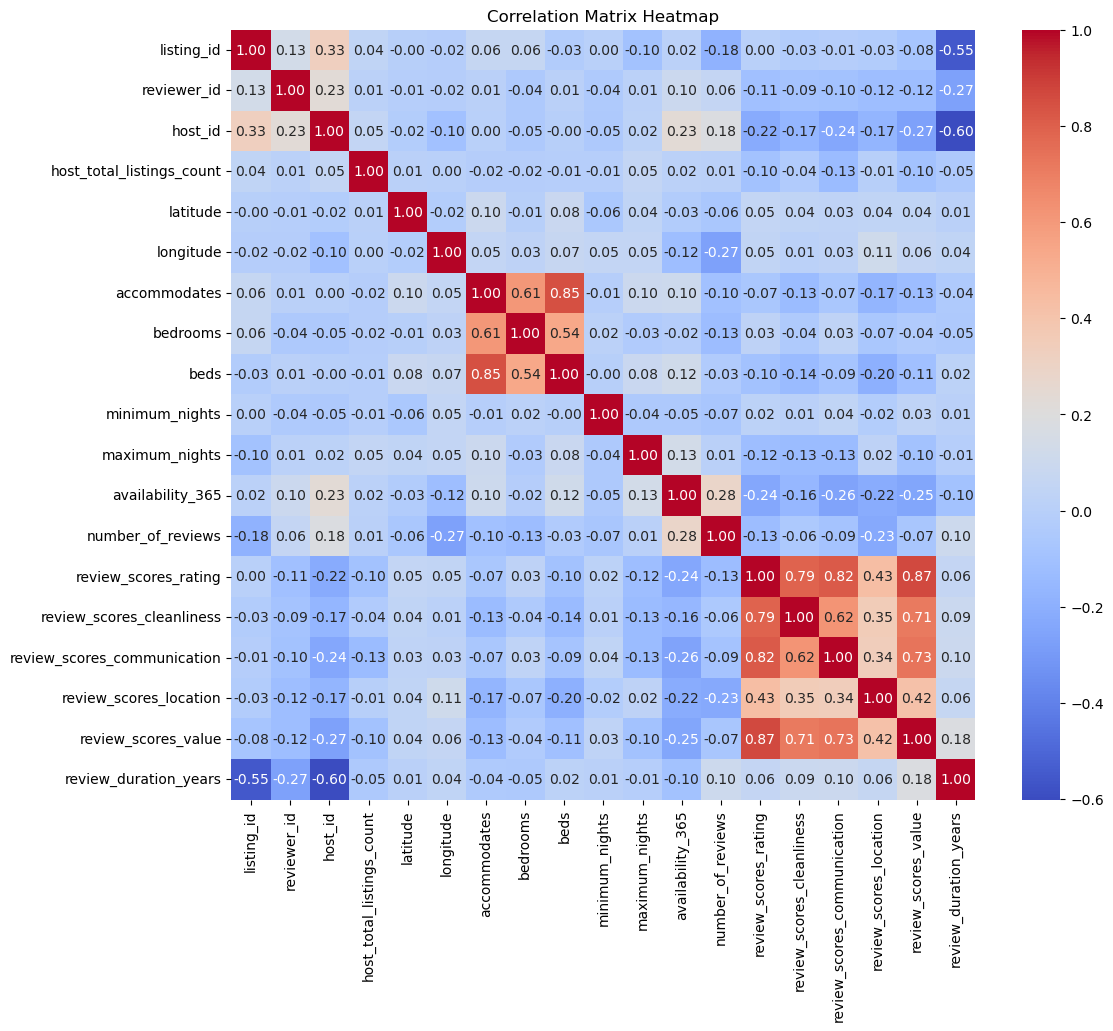

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_columns = combined_df.select_dtypes(include='number').columns

numerical_df = combined_df[numerical_columns]

corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')
plt.show()

In [206]:
combined_df.describe()

,listing_id,date,reviewer_id,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,review_duration_years
count,3.269690e+05,326969,3.269690e+05,3.269690e+05,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000,326969.000000
mean,7.241506e+16,2020-12-01 00:34:18.470374656,1.568440e+08,9.216048e+07,4.587894,52.367760,4.890347,2.706887,1.174683,1.663283,2.495695,504.422364,149.572412,356.403255,4.801140,4.791058,4.887125,4.797221,4.643666,6.225254
min,2.818000e+03,2009-03-30 00:00:00,1.000000e+00,3.159000e+03,1.000000,52.290340,4.755870,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.625228e+06,2018-10-03 00:00:00,3.343530e+07,7.181185e+06,1.000000,52.358406,4.875590,2.000000,1.000000,1.000000,1.000000,30.000000,46.000000,107.000000,4.720000,4.700000,4.840000,4.710000,4.540000,4.000000
50%,1.796739e+07,2021-11-08 00:00:00,1.030593e+08,2.964773e+07,2.000000,52.367320,4.891110,2.000000,1.000000,1.000000,2.000000,365.000000,141.000000,274.000000,4.840000,4.840000,4.930000,4.850000,4.670000,6.000000
75%,3.539432e+07,2023-05-12 00:00:00,2.393135e+08,1.354875e+08,3.000000,52.376960,4.905850,4.000000,1.000000,2.000000,3.000000,1125.000000,245.000000,459.000000,4.920000,4.930000,4.970000,4.940000,4.770000,9.000000
max,1.166649e+18,2024-06-10 00:00:00,5.817259e+08,5.785674e+08,770.000000,52.425120,5.026669,16.000000,10.000000,32.000000,365.000000,1125.000000,365.000000,3935.000000,5.000000,5.000000,5.000000,5.000000,5.000000,15.000000
std,2.321144e+17,NaN,1.515017e+08,1.273625e+08,27.001971,0.016761,0.034782,1.533640,0.716838,1.738233,6.195973,501.902617,110.697775,473.208173,0.154835,0.181175,0.121127,0.180899,0.172054,3.110393


In [207]:
df = combined_df

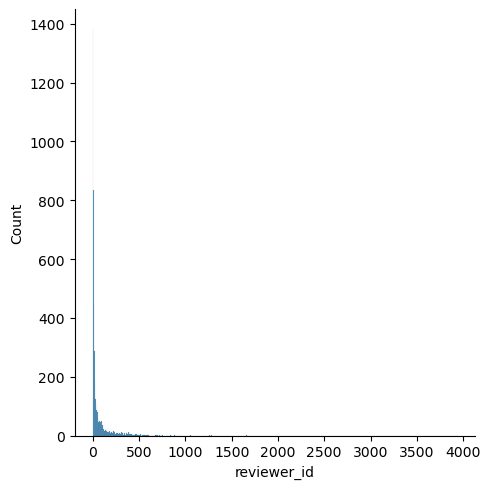

In [208]:
import seaborn as sns

count_ratings_df = df[['reviewer_id','listing_id']].groupby(['listing_id']).count()
sns.displot(data=count_ratings_df, x='reviewer_id', binwidth=5)

In [225]:
from ftfy import fix_text

from bs4 import BeautifulSoup

def clean_comment(text):
    
    if pd.isnull(text):
        
        return text 
    try:
        
        text_fixed = fix_text(text)
        
    except Exception:
        
        text_fixed = text  
        
    text_fixed = text_fixed.replace('<br/>', '\n')
    
    soup = BeautifulSoup(text_fixed, "html.parser")
    
    text_clean = soup.get_text()
    
    text_clean = text_clean.strip()
    
    return text_clean

df['comments'] = df['comments'].apply(clean_comment)

In [226]:
stop_words = [
    
    'the', 'is', 'in', 'and', 'to', 'a', 'of', 'it', 'we', 'was', 'for', 
    'but', 'on', 'with', 'as', 'you', 'at', 'this', 'that', 'had',
    'our', 'be', 'by', 'or', 'an', 'are', 'from', 'so', 'if', 'have',
    'my', 'they', 'which', 'one', 'their', 'there', 'what', 'more',
    'when', 'can', 'your', 'will', 'would', 'should', 'could', 'about',
    'out', 'up', 'them', 'some', 'me', 'just', 'into', 'has',
    'also', 'very', 'been', 'did', 'do', 'he', 'she', 'his', 'her', 'how',
    'then', 'than', 'other', 'over', 'because', 'any', 'only', 'were',
    'after', 'did', 'these', 'who', 'its', 'see', 'well', 'here',
    'get', 'got', 'even', 'make', 'made', 'us', 'you', 'your', 'yours',
    'I', 'am', 'he', 'she', 'it', 'we', 'they', 'you', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'myself', 'ourselves',
    'yourself', 'yourselves', 'himself', 'herself', 'itself', 'themselves',
    'each', 'few', 'many', 'some', 'such', 'very',
    's', 't', 'can', 'will', 'don', 'should', 'now'
    
]

In [227]:
import re

def remove_stop_words(text, stop_words):
    
    if pd.isnull(text):
        
        return text  

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]

    filtered_text = ' '.join(filtered_words)

    return filtered_text


In [228]:
df['comments'] = df['comments'].apply(lambda x: remove_stop_words(x, stop_words))

In [229]:
df['description'] = df['description'].apply(lambda x: remove_stop_words(x, stop_words))

In [230]:
import re

def clean_text(text):
    
    text = re.sub(r'<.*?>', '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

df['comments'] = df['comments'].apply(lambda x: clean_text(str(x)))

In [231]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import pandas as pd

def is_english(text):
    
    try:
        
        return detect(text[:50]) == 'en'
    
    except LangDetectException:
        
        return False

df['is_english_comment'] = df['comments'].apply(lambda x: is_english(str(x)))

df_english = df[df['is_english_comment'] == True].drop(columns=['is_english_comment'])

In [234]:
df_english.shape

(214523, 34)

In [235]:
df_english.to_csv('only_english_comments_ams.csv',index = False)

# Start here

In [ ]:
df = pd.read_csv('only_english_comments_ams.csv')

In [236]:
df.isnull().sum()

listing_id                     0
date                           0
reviewer_id                    0
comments                       0
name                           0
description                    0
host_id                        0
host_since                     0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
review_sco

In [ ]:
#df = df.dropna()

In [237]:
df.shape

(326969, 35)

In [239]:
def clean_amenities(amenities_str):

    amenities_cleaned = re.sub(r'[\[\],]', '', amenities_str)  
    amenities_cleaned = amenities_cleaned.strip()  
    return amenities_cleaned

df['amenities'] = df['amenities'].apply(clean_amenities)

In [240]:
df['amenities'].head()

135    "Hair dryer" "Iron" "High chair" "Smoke alarm"...
136    "Hair dryer" "Iron" "High chair" "Smoke alarm"...
137    "Hair dryer" "Iron" "High chair" "Smoke alarm"...
138    "Hair dryer" "Iron" "High chair" "Smoke alarm"...
139    "Hair dryer" "Iron" "High chair" "Smoke alarm"...
Name: amenities, dtype: object

In [241]:
city_center = (52.3731, 4.8922)

df['distance_to_center'] = df.apply(lambda row: geodesic((row['latitude'], row['longitude']), city_center).kilometers, axis=1)

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [242]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from geopy.distance import geodesic
from scipy.sparse import hstack
import numpy as np

df_grouped = df.groupby('listing_id').agg({
    'comments': lambda x: ' '.join(x),  
    'name': 'first',
    'description': 'first',
    'neighbourhood_cleansed': 'first',
    'latitude': 'first',
    'longitude': 'first',
    'property_type': 'first',
    'price': 'mean',  
    'review_scores_rating': 'mean', #putting first/mean is the same
    'distance_to_center': 'mean',  
    'amenities': lambda x: ','.join(set(','.join(x).split(',')))  
}).reset_index()

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2)) 

tfidf_matrix = vectorizer.fit_transform(df_grouped['name'] + " " + df_grouped['description'] + " " + df_grouped['comments'])

encoder = OneHotEncoder()

neighbourhood_encoded = encoder.fit_transform(df_grouped[['neighbourhood_cleansed']])

property_type_encoded = encoder.fit_transform(df_grouped[['property_type']])

df_grouped['amenities'] = df_grouped['amenities'].apply(lambda x: ','.join(x.split(',')))  

vectorizer_amenities = TfidfVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)

amenities_matrix = vectorizer_amenities.fit_transform(df_grouped['amenities'])

structured_features = np.array(df_grouped[['price', 'review_scores_rating', 'distance_to_center']])

scaler = StandardScaler()

structured_features_scaled = scaler.fit_transform(structured_features)

combined_features = hstack([tfidf_matrix, neighbourhood_encoded, property_type_encoded, amenities_matrix, structured_features_scaled])

cosine_sim = cosine_similarity(combined_features)

In [152]:
recommended_listings = get_similar_listings(0, 2) 
recommended_listings.head()

,listing_id,comments,name,description,neighbourhood_cleansed,latitude,longitude,property_type,price,review_scores_rating,distance_to_center,amenities
753,13034385,awesome great staying jans place great host pl...,Private room at the KNSM island Amsterdam,beautiful quiet apartment knsm island beautifu...,Oostelijk Havengebied - Indische Buurt,52.377174,4.948144,Private room in condo,95.0,4.81,3.836802,"""Iron"" ""Baking sheet"" ""Wine glasses"" ""Shampoo""..."
1696,32687052,leo amazing host kind incredibly helpful givin...,Eastern Docklands Studio,welcome studio borneo island eastern docklands...,Oostelijk Havengebied - Indische Buurt,52.370820,4.940390,Private room in condo,101.0,4.93,3.291884,"""Iron"" ""Shampoo"" ""EV charger"" ""Paid parking of..."


In [156]:
reviewer_counts = df.groupby('reviewer_id').size()

multi_reviews = reviewer_counts[reviewer_counts > 5]

print(multiple_reviews)

reviewer_id
443282       9
6427256      6
22891140     9
52858124     8
125979349    6
134906868    6
162331474    7
250731309    8
369641593    6
dtype: int64


In [165]:
df = df.drop('Unnamed: 0', axis = 1)

In [250]:
def get_listing_index(listing_id, df_grouped):
    try:
        return df_grouped[df_grouped['listing_id'] == listing_id].index[0]
    except IndexError:
        return None  

def get_similar_listings(listing_id, num_recommendations=3):

    listing_index = get_listing_index(listing_id, df_grouped)
    
    if listing_index is None:
        
        return pd.DataFrame()  

    sim_scores = list(enumerate(cosine_sim[listing_index]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:num_recommendations + 1]  
    
    similar_indices = [i[0] for i in sim_scores]
    
    return df_grouped.iloc[similar_indices]

for reviewer_id in multi_reviewers:
    
    train_reviews, test_reviews = split_reviews_by_reviewer(reviewer_id)
    
    if train_reviews is not None and not train_reviews.empty and not test_reviews.empty:
        
        listing_id = train_reviews['listing_id'].iloc[0]
        
        recommendations = get_similar_listings(listing_id, num_recommendations=1)
        
        if not recommendations.empty:
            
            true_test_listings = test_reviews['listing_id'].tolist()
            
            recommended_listings = recommendations['listing_id'].tolist()
            
            tp = len(set(recommended_listings) & set(true_test_listings))
            
            precision = tp / len(recommended_listings)
            
            recall = tp / len(true_test_listings)
            
            print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 1.00, Recall: 0.20
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00
Precision: 0.00, Recall: 0.00


In [95]:
# import pandas as pd
# from textblob import TextBlob

# def get_sentiment(text):
    
#     if isinstance(text, str): 
        
#         analysis = TextBlob(text)
        
#         return analysis.sentiment.polarity
    
#     else:
        
#         return None  

# df['sentiment'] = df['comments'].apply(get_sentiment)

# df['sentiment'].fillna(0, inplace=True)

In [181]:
combined_df.to_csv('final_preprocessed_df.csv', index = False)